# Capstone Regression Project

## Business Understanding

In this analysis I will focus on the helping Real estate Agency finding what indicator drive prices in house market.



## Data Understanding

The King County Sales Data covers most of the aspect that may impact on the house prices. Such as house prices, square feet living, bedrooms and batrooms etc. In the data I will start with Linear Regression basic model, evaluate it, and then I will provide justification for and proceed to a new model. Based on the results, I will discuss two features that have strong relationships with housing prices. What are the impact on the house prices?

# Data Preparation

## Importing Modules

In [ ]:
#modules for loading and processing dataset
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

#modules for visualizing dataset
import matplotlib.pyplot as plt
import seaborn as sns

#modules for machine learning algorithms
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, BayesianRidge,RANSACRegressor,HuberRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

#modules for evaluating the model
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

#modules for cross-validation and tuning the hyperparameters
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA, KernelPCA

#module for building a  pipeline
from sklearn.pipeline import Pipeline

## Loading Dataset

In [ ]:
pd.options.display.float_format = '{:20,.2f}'.format

In [ ]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,"675,000.00",4,1.00,1180,7140,1.00,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.46,-122.19
1,8910500230,12/13/2021,"920,000.00",5,2.50,2770,6703,1.00,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.71,-122.36
2,1180000275,9/29/2021,"311,000.00",6,2.00,2880,6156,1.00,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.50,-122.23
3,1604601802,12/14/2021,"775,000.00",3,3.00,2160,1400,2.00,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.57,-122.29
4,8562780790,8/24/2021,"592,500.00",2,2.00,1120,758,2.00,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.53,-122.07


## Basic Statistics about Dataset

### Data Exploration

In [ ]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
greenbelt         object
nuisance          object
view              object
condition         object
grade             object
heat_source       object
sewer_system      object
sqft_above         int64
sqft_basement      int64
sqft_garage        int64
sqft_patio         int64
yr_built           int64
yr_renovated       int64
address           object
lat              float64
long             float64
dtype: object

In [ ]:
df.shape

(30155, 25)

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,"30,155.00","30,155.00","30,155.00","30,155.00","30,155.00","30,155.00","30,155.00","30,155.00","30,155.00","30,155.00","30,155.00","30,155.00","30,155.00","30,155.00","30,155.00"
mean,"4,538,103,795.03","1,108,535.84",3.41,2.33,"2,112.42","16,723.60",1.54,"1,809.83",476.04,330.21,217.41,"1,975.16",90.92,47.33,-121.32
std,"2,882,587,298.12","896,385.66",0.98,0.89,974.04,"60,382.60",0.57,878.31,579.63,285.77,245.30,32.07,416.47,1.43,5.73
min,"1,000,055.00","27,360.00",0.00,0.00,3.00,402.00,1.00,2.00,0.00,0.00,0.00,"1,900.00",0.00,21.27,-157.79
25%,"2,064,175,145.00","648,000.00",3.00,2.00,"1,420.00","4,850.00",1.00,"1,180.00",0.00,0.00,40.00,"1,953.00",0.00,47.41,-122.33
50%,"3,874,010,800.00","860,000.00",3.00,2.50,"1,920.00","7,480.00",1.50,"1,560.00",0.00,400.00,150.00,"1,977.00",0.00,47.55,-122.23
75%,"7,287,100,141.00","1,300,000.00",4.00,3.00,"2,619.50","10,579.00",2.00,"2,270.00",940.00,510.00,320.00,"2,003.00",0.00,47.67,-122.12
max,"9,904,000,012.00","30,750,000.00",13.00,10.50,"15,360.00","3,253,932.00",4.00,"12,660.00","8,020.00","3,580.00","4,370.00","2,022.00","2,022.00",64.82,-70.07


In [ ]:
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

## Removing NULL values

Dropping out the null columns as they are very few in quantity.

In [ ]:
df.dropna(inplace=True)

## Label Encoding categorical values

Converting Object data types to numerical

In [ ]:
label_encoder = LabelEncoder()

df['waterfront']= label_encoder.fit_transform(df['waterfront'])
df['greenbelt']= label_encoder.fit_transform(df['greenbelt'])
df['sewer_system']= label_encoder.fit_transform(df['sewer_system'])
df['view']= label_encoder.fit_transform(df['view'])
df['condition']= label_encoder.fit_transform(df['condition'])
df['grade']= label_encoder.fit_transform(df['grade'])
df['nuisance'] = label_encoder.fit_transform(df['nuisance'])
df['heat_source'] = label_encoder.fit_transform(df['heat_source'])

# Exploratory Data Analysis (EDA)

Visualizing Longitude and Latitude

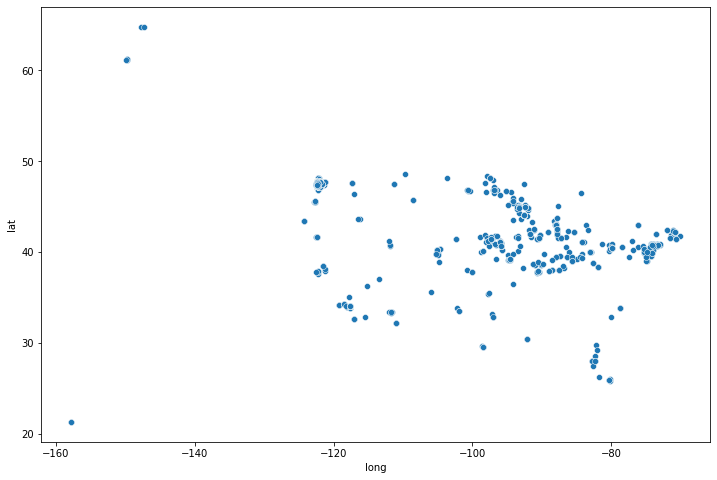

In [ ]:
#longitude and latitude 
plt.figure(figsize=(12,8)) #1
sns.scatterplot(x='long', y='lat', data=df);
plt.savefig('Location')

**Analysis**

I have visialized the datasamples using the longitude and latitude feature.

![picture](https://drive.google.com/uc?export=view&id=1khz2P-RB6TCd5VE50x3D0e-icd9kMpjk)

If we compare the visualized data samples with the map of king county we can see that there are some outliers in the dataset. These datapoints, if left in the dataset are going to create irregularites in it.

### Removing samples outside of king county

In [ ]:
df = df.drop(df[(df.lat > 55.0) & (df.lat < 25.0)].index) #2
df = df.drop(df[df.long < -140.0].index)

Visualization of longitude and latitude after removing outliers

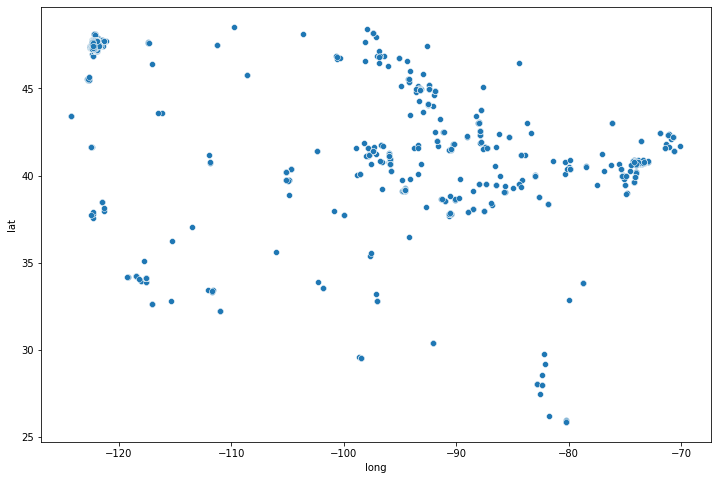

In [ ]:
#longitude and latitude 
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df); #3
plt.savefig('Location')

After removing the outliers the visualization is much closer to the map provided above

House and Price Distribution

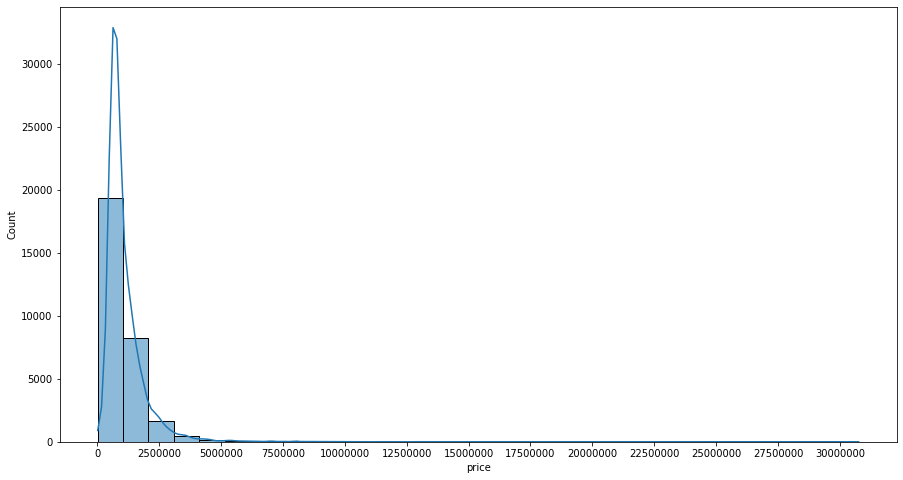

In [ ]:
plt.figure(figsize = (15,8))
plt.ticklabel_format(style='plain')
hist = sns.histplot(df['price'] ,kde=True, bins=30)
hist.set_xticks(range(0,32500000, 2500000))

**Analysis**

A large number of houses are below 2.5 million. From our basic statistics we can that the lowest house price is at 27,360.00 and max price is at 30,750,000.00. The house prices have a standard deviation of 896,385.66. These values along with the histogram strongly indicate that there are outliers in the price feature as well.

Living space Distribution


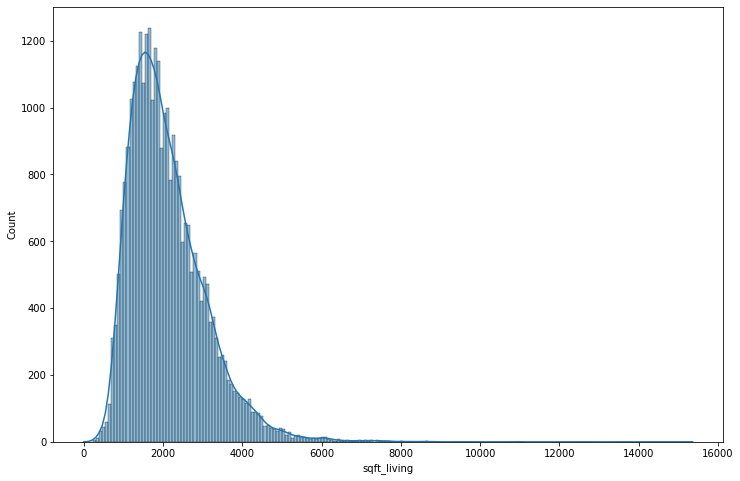

In [ ]:
plt.figure(figsize = (12,8))
sns.histplot(df['sqft_living'], kde=True);

**Analysis**

The sq feet living has a average of around 2,000 while the lowest value is at 900 and the hisgest at 15,000. Again there are outliers present here as well.

In [ ]:
df.bedrooms.value_counts()

3     12740
4      9591
2      3922
5      2794
6       498
1       381
7        80
0        39
8        38
9        14
10        3
11        1
13        1
Name: bedrooms, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


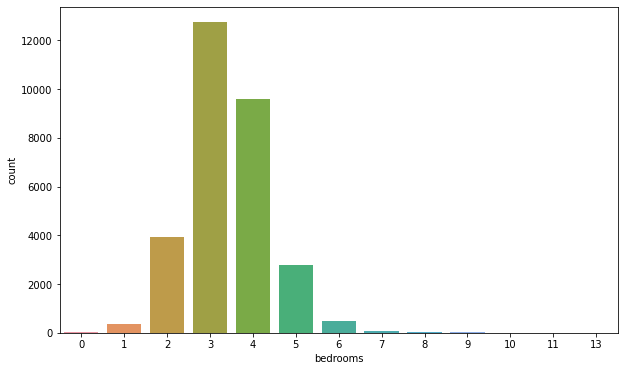

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(df['bedrooms']);

**Analysis**
* There are a few outliers present here but most of the values are accurately distributed.
* A large number of houses have 3 bedrooms

Checking price and bedrooms relationship


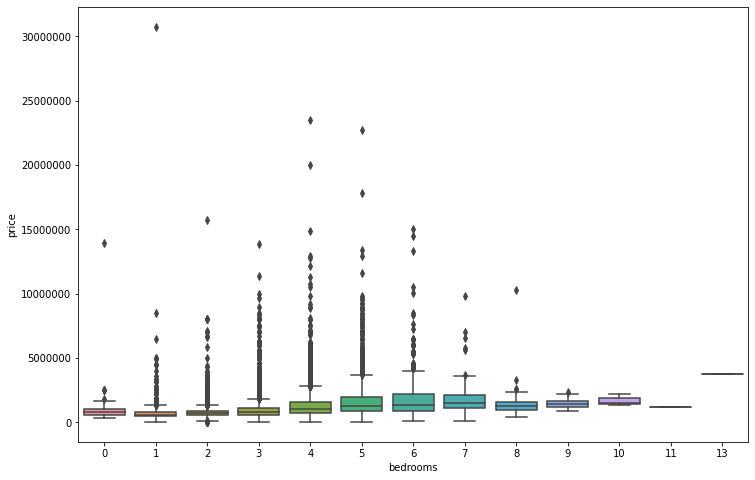

In [ ]:
plt.figure(figsize= (12,8))
plt.ticklabel_format(style='plain')
sns.boxplot(x='bedrooms', y='price', data=df);

Looking at the bedroom and price distribution. There are 11 and 13 bedrooms houses and it seems like these are outliers. I am assuming that there is a positive correlation between bedroom and house price.

Checking price and bedrooms relationship


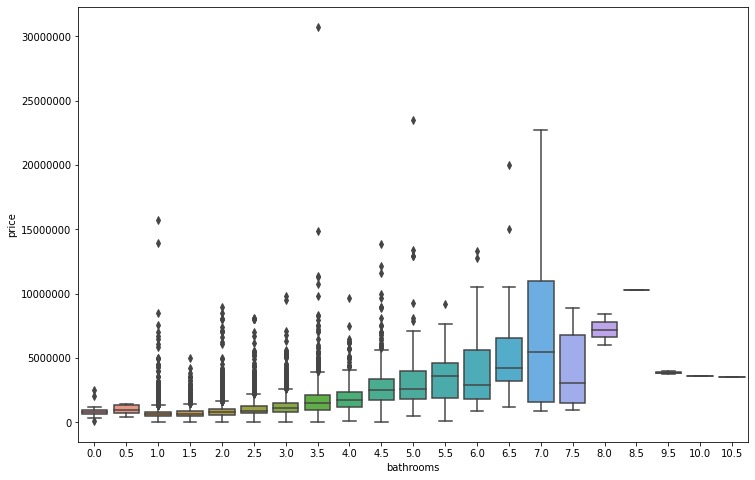

In [ ]:
plt.figure(figsize= (12,8))
plt.ticklabel_format(style='plain')
sns.boxplot(x='bathrooms', y='price', data=df);

It seems like bathroom are correlated with higher pricing. More bathrooms you have the more expensive the property becomes.

Checking relationship between price and grade


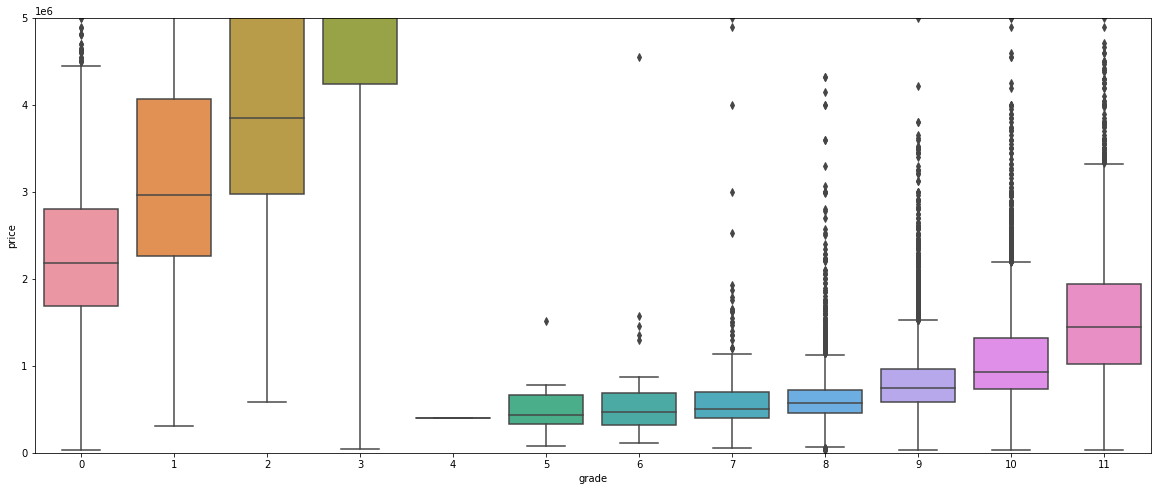

In [ ]:
plt.figure(figsize= (20,8))
fig = sns.boxplot(x='grade', y='price', data=df)
fig.axis(ymin=0, ymax= 5000000);


There is a relationship between the grade and price of the proprerty. Higher the grade, higher the price

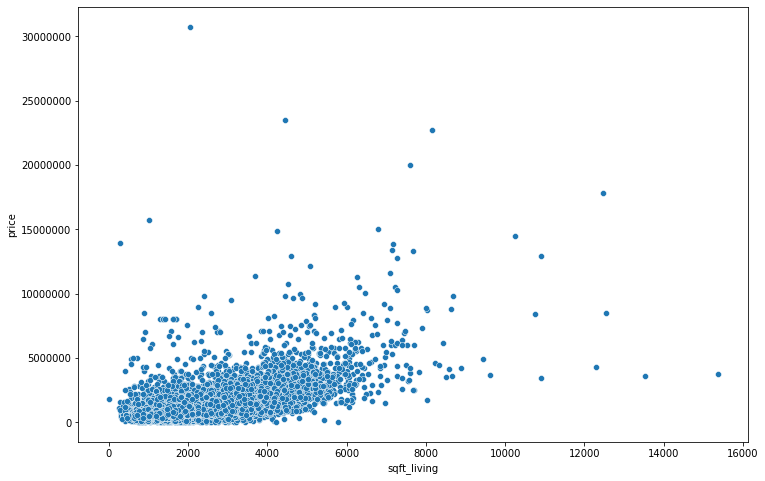

In [ ]:
#living space
plt.figure(figsize = (12,8))
plt.ticklabel_format(style='plain')
sns.scatterplot(x='sqft_living', y='price', data=df);

As we increased the living space of the house, value of the property price goes up.

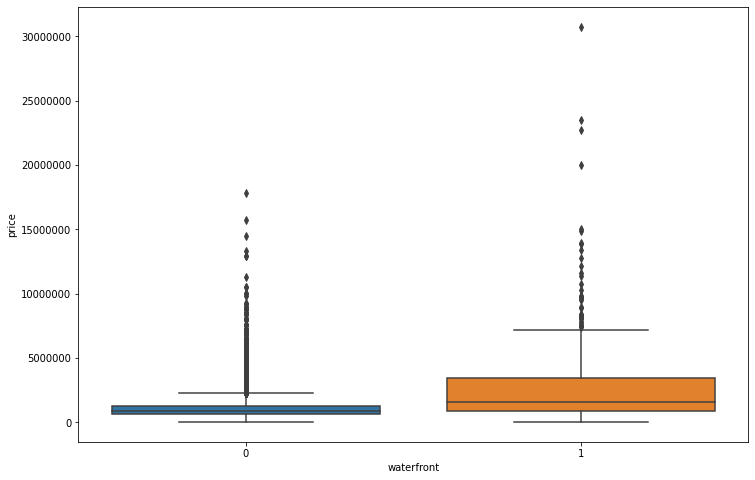

In [ ]:
# waterfront
plt.figure(figsize = (12,8))
plt.ticklabel_format(style='plain')
sns.boxplot(x= 'waterfront', y='price', data=df);

As we see here waterfront properties seems like effected on the prices. The median value shows there are some properties with waterfront that in price range.

In [ ]:
corr = df.corr()
corr.shape

(23, 23)

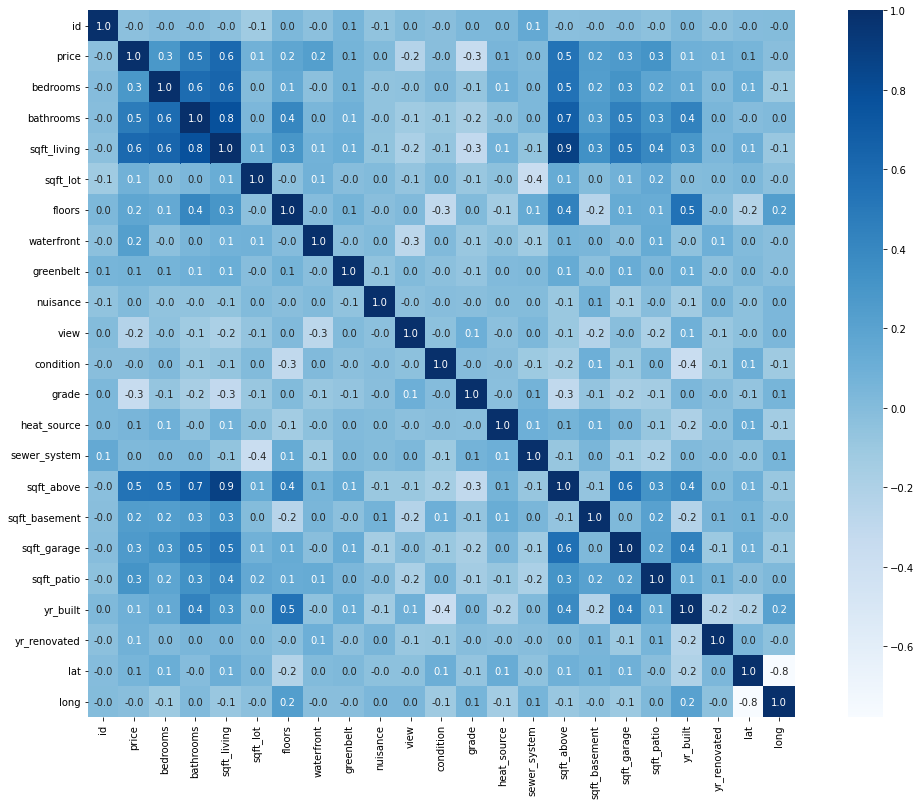

In [ ]:
plt.figure(figsize=(19,13))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues');
plt.savefig('heatmap')

Looking at the correlation table we can see that the sqft_living and sqft_above have a very high colinearity of 0.9. We will have to remove one of them to eliminate redundancy.

As for price variable, features like bedrooms, bathrooms, sqft_living, sqft_above, grade, sqft_patio and sqft_garage have very high correlation.

## Data Cleaning

### Removing redundant columns

In [ ]:
numeric_vars = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'view', 'condition', 
                'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio','yr_built', 'yr_renovated']

In [ ]:
df_preprocessed = df.loc[:, numeric_vars]
df_preprocessed.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated
0,675000.0,4,1.0,1180,7140,1.0,0,0,4,2,9,2,2,1180,0,0,40,1969,0
1,920000.0,5,2.5,2770,6703,1.0,0,0,0,0,9,4,2,1570,1570,0,240,1950,0
2,311000.0,6,2.0,2880,6156,1.0,0,0,0,0,9,2,2,1580,1580,0,0,1956,0
3,775000.0,3,3.0,2160,1400,2.0,0,0,0,0,11,2,2,1090,1070,200,270,2010,0
4,592500.0,2,2.0,1120,758,2.0,0,0,4,0,9,0,2,1120,550,550,30,2012,0


### Calculating IQR

We will be using the interquartile range method to find the number of outliers in all the features that we have kept

In [ ]:
def calc_interquartile(data, column):
    global lower, upper
    #calculating the first and third quartile
    first_quartile, third_quartile = np.percentile(data[column], 25), np.percentile(data[column], 75)
    #calculate the interquartilerange
    iqr = third_quartile - first_quartile
    # outlier cutoff (1.5 is a generally taken as a threshold thats why i am also taking it)
    cutoff = iqr*1.5
    #calculate the lower and upper limits
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    #remove the outliers from the columns
    upper_outliers = data[data[column] > upper]
    lower_outliers = data[data[column] < lower]
    print('Lower outliers', lower_outliers.shape[0])
    print('Upper outliers', upper_outliers.shape[0])
    return print('total outliers', upper_outliers.shape[0] + lower_outliers.shape[0])

In [ ]:
for i in df_preprocessed.columns:
    print('Total outliers in ', i)
    calc_interquartile(df_preprocessed, i)
    print()

Total outliers in  price
Lower outliers 0
Upper outliers 1989
total outliers 1989

Total outliers in  bedrooms
Lower outliers 420
Upper outliers 635
total outliers 1055

Total outliers in  bathrooms
Lower outliers 25
Upper outliers 348
total outliers 373

Total outliers in  sqft_living
Lower outliers 0
Upper outliers 723
total outliers 723

Total outliers in  sqft_lot
Lower outliers 0
Upper outliers 3547
total outliers 3547

Total outliers in  floors
Lower outliers 0
Upper outliers 30
total outliers 30

Total outliers in  waterfront
Lower outliers 0
Upper outliers 511
total outliers 511

Total outliers in  greenbelt
Lower outliers 0
Upper outliers 772
total outliers 772

Total outliers in  view
Lower outliers 3556
Upper outliers 0
total outliers 3556

Total outliers in  condition
Lower outliers 0
Upper outliers 0
total outliers 0

Total outliers in  grade
Lower outliers 2362
Upper outliers 0
total outliers 2362

Total outliers in  heat_source
Lower outliers 6511
Upper outliers 3016
tot

In [ ]:
def z_score(data, column):
    #creating global variables for plotting the graph for better demonstration
    global zscore, outlier
    #creating lists to store zscore and outliers 
    zscore = []
    outlier =[]
    # for zscore generally taken thresholds are 2.5, 3 or 3.5 hence i took 3
    threshold = 3
    # calculating the mean of the passed column
    mean = np.mean(data[column])
    # calculating the standard deviation of the passed column
    std = np.std(data[column])
    for i in data[column]:
        z = (i-mean)/std
        zscore.append(z)
        #if the zscore is greater than threshold = 3 that means it is an outlier
        if np.abs(z) > threshold:
            outlier.append(i)

In [ ]:
z_score(df_preprocessed, 'price')

### Removing outliers using z-score

We are removing the outliers by creating a function for calculating zscore which is subtracting the mean from every data point and dividing by the standard deviation and if the zscore value of any data point 
is less than -3 or greater than 3, then that data point is an outlier

In [ ]:
#remove the outliers from price using zscore
dj=[]
for i in df_preprocessed.price:
    if i in set(outlier):
        dj.append(0.0)
    else:
        dj.append(i)
        
df_preprocessed['P'] = dj

x = df_preprocessed.drop(df_preprocessed[df_preprocessed['P'] == 0.0].index) 
x.shape

(29667, 20)

In [ ]:
df_preprocessed = df_preprocessed.drop(['sqft_living'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  


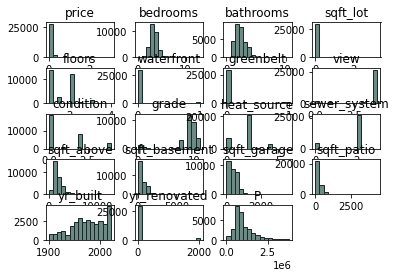

In [ ]:
df_preprocessed.hist(bins=15, color='#6e8a84', edgecolor='#172929', linewidth=1.0, grid=False)
plt.tight_layout(rect=(1,1,3,3))

In [ ]:
# full sample target variable and independent variable
y = df_preprocessed['price']
X = df_preprocessed.drop('price', axis=1)

A min max scaler is being used initally to scale the dataset

In [ ]:
# creating and initializing scaler using MinMax
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [ ]:
# performing the transform in the data Normalization between 0 and 1
X = pd.DataFrame(scaler.transform(X), columns=X.columns)

# Spliting Data

We are splitting the dataset into 1:3 train test ratio. A random state of 42 is being used to reproduce the results

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

## Modeling

### Baseline Model

In [ ]:
#create linear Regression 
model = LinearRegression()

#train the model using the training set
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#model prediction on train data
y_pred = model.predict(X_train)

In [ ]:
#model evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.5172093155888322
MAE: 288779.75715242716
MSE: 378587847731.4772
RMSE: 615294.9274384417


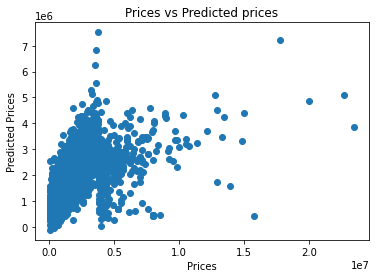

In [ ]:
# Visualization the difference between actual price and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted prices")
plt.show()

### Model Iteration

In [ ]:
sc = ('Scaler', StandardScaler())
est =[]
est.append(('LinearRegression', Pipeline([sc, ('LinearRegression', LinearRegression())])))
est.append(('Ridge', Pipeline([sc, ('Ridge', Ridge())])))
est.append(('Lasso', Pipeline([sc, ('Lasso', Lasso())])))
est.append(('BayesianRidge', Pipeline([sc, ('BayesianRidge', BayesianRidge())])))
est.append(('ElasticNet', Pipeline([sc,('Elastic', ElasticNet())])))
est.append(('SGD', Pipeline([sc,('SGD', SGDRegressor())])))
est.append(('Huber', Pipeline([sc,('Huber', HuberRegressor())])))
est.append(('RANSAC', Pipeline([sc,('RANSAC', RANSACRegressor())])))
est.append(('GradientBoosting', Pipeline([sc,('GradientBoosting',GradientBoostingRegressor())])))
est.append(('AdaBoost', Pipeline([sc, ('AdaBoost', AdaBoostRegressor())])))
est.append(('ExtraTree', Pipeline([sc,('ExtraTrees', ExtraTreesRegressor())])))
est.append(('RandomForest', Pipeline([sc,('RandomForest', RandomForestRegressor())]))) 
est.append(('Bagging', Pipeline([sc,('Bagging', BaggingRegressor())])))
est.append(('KNeighbors', Pipeline([sc,('KNeighbors', KNeighborsRegressor())])))
est.append(('DecisionTree', Pipeline([sc,('DecisionTree', DecisionTreeRegressor())])))
est.append(('XGB', Pipeline([sc,('XGB', XGBRegressor())])))

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

splits = 7
score = 'r2'
models_score =[]
for i in est:
    kfold = KFold(n_splits=splits)
    results = cross_val_score(i[1], X_train, y_train, cv=kfold, scoring=score)
    models_score.append({i[0] : '{} +/- {}'.format(results.mean(), results.std())})
    print(f'Done training {i[0]}')

Done training LinearRegression
Done training Ridge
Done training Lasso
Done training BayesianRidge
Done training ElasticNet
Done training SGD
Done training Huber
Done training RANSAC
Done training GradientBoosting
Done training AdaBoost
Done training ExtraTree
Done training RandomForest
Done training Bagging
Done training KNeighbors
Done training DecisionTree
[10:24:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:25:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:25:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:25:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10

In [ ]:
models_score

[{'LinearRegression': '0.5166550666826357 +/- 0.04216270246581077'},
 {'Ridge': '0.5166565462719633 +/- 0.042164301278235256'},
 {'Lasso': '0.5166552159023733 +/- 0.042163025440910995'},
 {'BayesianRidge': '0.5166889807883576 +/- 0.042200948601768776'},
 {'ElasticNet': '0.4896875332814982 +/- 0.046929201299664026'},
 {'SGD': '0.5156011133188197 +/- 0.0494969547586516'},
 {'Huber': '0.26040777864321746 +/- 0.09418475225539044'},
 {'RANSAC': '0.2604076933883243 +/- 0.09418478370873742'},
 {'GradientBoosting': '0.8843153814763552 +/- 0.03524179846647998'},
 {'AdaBoost': '0.770832022110684 +/- 0.044645544989400585'},
 {'ExtraTree': '0.8918849664827356 +/- 0.031161563873968626'},
 {'RandomForest': '0.8948564545897753 +/- 0.03588101483605309'},
 {'Bagging': '0.8853206112617098 +/- 0.039771394844653835'},
 {'KNeighbors': '0.7389407624531835 +/- 0.04022591297226283'},
 {'DecisionTree': '0.797472524489598 +/- 0.0615885725130149'},
 {'XGB': '0.8909178296910513 +/- 0.04239720612977776'}]

### Final Model

In [ ]:
est[-1][1].fit(X_train, y_train)
pred = est[-1][1].predict(X_test)
est[-1][1].score(X_test,y_test)

[11:17:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8620649551276064

In [ ]:
#Tuning only XGB as it has the higher accuracy
est =[]
est.append(('XGB', Pipeline([sc,('XGB', XGBRegressor())])))

best = []

parameters = {
              
              'XGB': {'XGB__learning_rate': [0.1,0.2,0.3,0.4],
                         
                         'XGB__max_depth': [4,6,8],
                      'XGB__n_estimators': [100,500,1000,1500]}
             }

for i in est:
    kfold = KFold(n_splits=5)
    grid = RandomizedSearchCV(estimator=i[1], param_distributions = parameters[i[0]], cv = kfold, n_jobs=-1, verbose=100)
    grid.fit(X_train, y_train)
    best.append((i[0], grid.best_score_,  grid.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[10:44:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
best

[('XGB',
  0.8737466703349742,
  {'XGB__n_estimators': 1500, 'XGB__max_depth': 4, 'XGB__learning_rate': 0.1})]

In [ ]:
s_scaler = StandardScaler()
xgb = XGBRegressor(learning_rate=0.1, max_depth=4, n_estimators=1500)
xgb.fit(s_scaler.fit_transform(X_train), y_train)
xgb.score(s_scaler.fit_transform(X_train),y_train)

[11:28:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9999233629146708

In [ ]:
y_pred = xgb.predict(s_scaler.fit_transform(X_test))
xgb.score(s_scaler.fit_transform(X_test),y_test)

0.8653372562602575

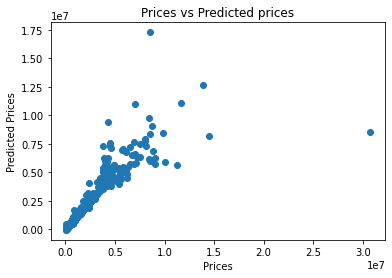

In [ ]:
# Visualization the difference between actual price and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted prices")
plt.show()

Now Fitting with the best Hyperparameters after performing Randmoized search

## Regression Results

Performed Regression on several regression models including Linear Regression, Random forest, Gradient Boosting and XGboost etc. But XG Boost yields the best R score. After selceting XGboost as our final model, I tuned its hyperparameters using Randomized search cv so that it can select best performing parameters.

## Level Up: Project Enhancements

After completing the minimum project requirements, you could consider the following enhancements if you have time:

* Consider applying a linear or non-linear transformation to your features and/or target
* Investigate the linear regression assumptions for your final model
* Identify and remove outliers, then redo the analysis
* Compile the data cleaning code into a function

## Conclusion

To conclude following are the some of important points noticed while analysing the dataset:

*   Every unit increase in Square feet living, and Bathrooms will increase the predicted price.
*   Predicted price decreases with unit increase in Bedrooms.
*   The predicted price will increase with increase in latitude as the location moves from South to North and will decrease with increase in longitude as the location moves from West to East.
*   Predicted price is high for houses with waterfront.





